In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import string

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Algorithms
from keras.layers import Flatten,LSTM,Conv1D,Dropout,Bidirectional, GRU, RNN, Concatenate
from keras.utils import plot_model
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from keras.models import Model

/var/folders/dn/t8s0kyv52pbfv6q_x3r132rw0000gn/T/ipykernel_82243/761400671.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranjalmishra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
datapath = './dataset/'
train = pd.read_csv(datapath + 'train.tsv', header=None, index_col=0, delimiter='\t')


In [3]:
print(train.shape)

(10240, 15)


In [4]:
train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",They compounded their error by combining full ...
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,"Romney said that ""Obamacare means that for up..."
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,But that it leaves out important details and t...


In [5]:
train.columns = ['ID', 'label', 'statement', 'subject', 'speaker', 'job title', 
                 'state info', 'party', 'bt', 'f', 'ht', 'mt', 'pof', 'context', 
                 'justification']

In [6]:
train

,ID,label,statement,subject,speaker,job title,state info,party,bt,f,ht,mt,pof,context,justification
0,,,,,,,,,,,,,,,
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",They compounded their error by combining full ...
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,"Romney said that ""Obamacare means that for up..."
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,But that it leaves out important details and t...


In [7]:
train.drop(['ID','job title', 'state info','party','bt','f','mt','ht','pof','justification'], axis=1, inplace=True)

In [8]:
train

,label,statement,subject,speaker,context
0,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN
...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,"interview on ""The Colbert Report"""
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,an interview
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,a Republican presidential debate


In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Removing special characters and punctuation
    filtered_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in filtered_tokens]
    
    # Removing empty strings resulting from removing special characters
    filtered_tokens = [token for token in filtered_tokens if token]
    
    # Join tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text

In [10]:
train['Processed_statement'] = train['statement'].apply(preprocess_text)

In [11]:
train

,label,statement,subject,speaker,context,Processed_statement
0,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer,says annies list political group supports thir...
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.,decline coal start started natural gas took st...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver,hillary clinton agrees john mccain voting give...
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release,health care reform legislation likely mandate ...
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN,economic turnaround started end term
...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,"interview on ""The Colbert Report""",larger number shark attacks florida cases vote...
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,an interview,democrats become party atlanta metro area blacks
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,a Republican presidential debate,says alternative social security operates galv...


In [12]:
def get_vader_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

In [13]:
train['sentiment_score'] = train['statement'].apply(get_vader_sentiment)

In [14]:
train

,label,statement,subject,speaker,context,Processed_statement,sentiment_score
0,,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer,says annies list political group supports thir...,0.2500
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.,decline coal start started natural gas took st...,0.3612
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver,hillary clinton agrees john mccain voting give...,0.3182
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release,health care reform legislation likely mandate ...,0.7579
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN,economic turnaround started end term,0.0000
...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,"interview on ""The Colbert Report""",larger number shark attacks florida cases vote...,-0.7506
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,an interview,democrats become party atlanta metro area blacks,0.4019
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,a Republican presidential debate,says alternative social security operates galv...,0.5859


In [19]:
def assign_labels_to_sentiment(data):
    # Define sentiment bins and corresponding labels
    bins = [-1, -0.6, -0.2, 0, 0.2, 0.6, 1]
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    data['new_label'] = pd.cut(data['sentiment_score'], bins=bins, labels=labels, include_lowest=True)
    return data
    

In [20]:
train = assign_labels_to_sentiment(train)

In [21]:
train

,label,statement,subject,speaker,context,Processed_statement,sentiment_score,new_label
0,,,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer,says annies list political group supports thir...,0.2500,mostly-true
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.,decline coal start started natural gas took st...,0.3612,mostly-true
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver,hillary clinton agrees john mccain voting give...,0.3182,mostly-true
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release,health care reform legislation likely mandate ...,0.7579,true
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN,economic turnaround started end term,0.0000,barely-true
...,...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,"interview on ""The Colbert Report""",larger number shark attacks florida cases vote...,-0.7506,pants-fire
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,an interview,democrats become party atlanta metro area blacks,0.4019,mostly-true
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,a Republican presidential debate,says alternative social security operates galv...,0.5859,mostly-true


In [22]:
tfidf_vectorizer = TfidfVectorizer()

In [23]:
tfidf_matrix = tfidf_vectorizer.fit_transform(train['Processed_statement'])

In [24]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [25]:
print(tfidf_df)

       005   01   02  025   03   04  047   05   06   07  ...  zip  zippo  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
10235  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
10236  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
10237  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
10238  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
10239  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   

       zombie  zombies  zone  zones  zoning  zoo  zuckerberg  zuckerbergs  
0         0

In [26]:
print(train.new_label.unique())

['mostly-true', 'true', 'barely-true', 'false', 'half-true', 'pants-fire']
Categories (6, object): ['pants-fire' < 'false' < 'barely-true' < 'half-true' < 'mostly-true' < 'true']


In [27]:
print(train.label.unique())
Y_binary = []
# all_data.label.unique().tolist()
for i in train['label']:
    if i=='false' or i=='barely-true' or i=='pants-fire':
        Y_binary+=[0]
    else:
        Y_binary+=[1]

Y_six = []

for i in train['label']:
    if i =='pants-fire':
        Y_six+=[0]
    elif i=='false':
        Y_six+=[1]
    elif i=='barely-true':
        Y_six+=[2]
    elif i=='half-true':
        Y_six+=[3]
    elif i=='mostly-true':
        Y_six+=[4]
    else:
        Y_six+=[5]
        
# train.label.unique()
print(len(Y_binary), len(Y_six))

['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']
10240 10240


In [28]:
X = tfidf_vectorizer.fit_transform(train['Processed_statement'])
y = train['new_label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [30]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [31]:
y_pred = nb_classifier.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.44384765625


In [33]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

 barely-true       0.43      0.98      0.60       783
       false       0.48      0.12      0.20       405
   half-true       0.00      0.00      0.00       107
 mostly-true       0.51      0.20      0.29       424
  pants-fire       0.80      0.02      0.04       193
        true       0.00      0.00      0.00       136

    accuracy                           0.44      2048
   macro avg       0.37      0.22      0.19      2048
weighted avg       0.44      0.44      0.33      2048



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## logistic regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.544921875
              precision    recall  f1-score   support

 barely-true       0.54      0.90      0.68       783
       false       0.52      0.39      0.45       405
   half-true       0.00      0.00      0.00       107
 mostly-true       0.52      0.48      0.50       424
  pants-fire       0.86      0.22      0.35       193
        true       0.69      0.07      0.12       136

    accuracy                           0.54      2048
   macro avg       0.52      0.34      0.35      2048
weighted avg       0.55      0.54      0.49      2048



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM

In [38]:
from sklearn.svm import SVC 

In [39]:
model = SVC(kernel='linear', random_state=42)  # 'linear' kernel is commonly used for text data
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.61865234375


In [42]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 barely-true       0.62      0.91      0.74       783
       false       0.57      0.51      0.54       405
   half-true       0.50      0.02      0.04       107
 mostly-true       0.61      0.62      0.61       424
  pants-fire       0.85      0.35      0.50       193
        true       0.86      0.13      0.23       136

    accuracy                           0.62      2048
   macro avg       0.67      0.42      0.44      2048
weighted avg       0.64      0.62      0.58      2048



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.63623046875


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

 barely-true       0.66      0.91      0.76       783
       false       0.59      0.52      0.56       405
   half-true       0.65      0.14      0.23       107
 mostly-true       0.57      0.65      0.61       424
  pants-fire       0.84      0.35      0.50       193
        true       0.73      0.16      0.27       136

    accuracy                           0.64      2048
   macro avg       0.68      0.46      0.49      2048
weighted avg       0.65      0.64      0.60      2048



In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Define individual classifiers
nb_clf = MultinomialNB()
rf_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(probability=True)  # Enable probability estimates for SVC


In [ ]:
# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', nb_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted probabilities
)


In [ ]:
# Fit the model
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))])

In [ ]:
# Predict and evaluate accuracy
y_pred = voting_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5400390625


## Cnn


In [ ]:
analyzer = SentimentIntensityAnalyzer()
train['newsentiment'] = train['statement'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train['statement'])
sequences = tokenizer.texts_to_sequences(train['Processed_statement'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
labels = np.array(train['label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [ ]:
train

,label,statement,subject,speaker,context,Processed_statement,sentiment_score,new_label,newsentiment
0,,,,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer,says annies list political group supports thir...,0.2500,mostly-true,0.2500
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.,decline coal start started natural gas took st...,0.3612,mostly-true,0.3612
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver,hillary clinton agrees john mccain voting give...,0.3182,mostly-true,0.3182
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release,health care reform legislation likely mandate ...,0.7579,true,0.7579
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN,economic turnaround started end term,0.0000,barely-true,0.0000
...,...,...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,"interview on ""The Colbert Report""",larger number shark attacks florida cases vote...,-0.7506,pants-fire,-0.7506
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,an interview,democrats become party atlanta metro area blacks,0.4019,mostly-true,0.4019
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,a Republican presidential debate,says alternative social security operates galv...,0.5859,mostly-true,0.5859


In [ ]:
model = Sequential([
    Embedding(10000, 128),  # Removed input_length parameter
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ensure the data types are all floats
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both train and test labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
X_train = np.nan_to_num(X_train)  # Replace NaNs with zero or another strategy
X_test = np.nan_to_num(X_test)  # Replace NaNs with zero or another strategy


In [ ]:
history1 = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1936 - loss: -11278573.0000 - val_accuracy: 0.1958 - val_loss: -572875136.0000
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1960 - loss: -3503840256.0000 - val_accuracy: 0.1958 - val_loss: -33663211520.0000
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1983 - loss: -77458432000.0000 - val_accuracy: 0.1958 - val_loss: -332758417408.0000
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1945 - loss: -550203031552.0000 - val_accuracy: 0.1958 - val_loss: -1496416387072.0000
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2024 - loss: -2066140889088.0000 - val_accuracy: 0.1958 - val_loss: -4595549470720.0000
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1963 - loss: -6047408848896.0000 - val_accuracy: 0.1958 - val_loss: -10991186214912.0000
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1953 - loss: -133929

# Gradient Boost Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing and training the GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gbm = gbm_model.predict(X_test)

In [ ]:
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"GBM Accuracy: {accuracy_gbm}")

GBM Accuracy: 0.2353515625


In [ ]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.16      0.06      0.08       339
           1       0.27      0.38      0.31       401
           2       0.25      0.37      0.30       438
           3       0.22      0.28      0.24       382
           4       0.09      0.02      0.03       148
           5       0.23      0.11      0.15       340

    accuracy                           0.24      2048
   macro avg       0.20      0.20      0.19      2048
weighted avg       0.22      0.24      0.21      2048



# HYBRID CNN

In [ ]:
vocab_size = 10000  # Adjust as per your vocabulary size
max_length = 500    # Maximum length of input sequences
embedding_dim = 50 

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train['Processed_statement'])
sequences = tokenizer.texts_to_sequences(train['Processed_statement'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [ ]:
sentiment_scores = np.array(train['sentiment_score']).reshape(-1, 1)

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train['label'])
one_hot_labels = to_categorical(encoded_labels)


In [ ]:
X_train_text, X_test_text, X_train_sentiment, X_test_sentiment, y_train, y_test = train_test_split(
    padded_sequences, sentiment_scores, one_hot_labels, test_size=0.2, random_state=42)


In [ ]:
input_text = Input(shape=(max_length,))
input_sentiment = Input(shape=(1,))

In [ ]:
# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_text)

conv1 = Conv1D(128, 3, activation='relu')(embedding_layer)
conv1 = GlobalMaxPooling1D()(conv1)

In [ ]:
conv2 = Conv1D(128, 4, activation='relu')(embedding_layer)
conv2 = GlobalMaxPooling1D()(conv2)

conv3 = Conv1D(128, 5, activation='relu')(embedding_layer)
conv3 = GlobalMaxPooling1D()(conv3)

In [ ]:
text_features = Concatenate()([conv1, conv2, conv3])
all_features = Concatenate()([text_features, Flatten()(input_sentiment)])


In [ ]:
# Dense layers
dense1 = Dense(128, activation='relu')(all_features)
dense1 = Dropout(0.5)(dense1)
output = Dense(len(label_encoder.classes_), activation='softmax')(dense1)


In [ ]:
model = Model(inputs=[input_text, input_sentiment], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 500, 50)   │    500,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 498, 128)  │     19,328 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 497, 128)  │     25,728 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 496, 128)  │     32,128 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_3[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_4[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1)         │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 385)       │          0 │ concatenate[0][0… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     49,408 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 6)         │        774 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 627,366 (2.39 MB)

 Trainable params: 627,366 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit([X_train_text, X_train_sentiment], y_train, epochs=5, batch_size=32,
                    validation_data=([X_test_text, X_test_sentiment], y_test))


Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.1878 - loss: 1.7729 - val_accuracy: 0.2261 - val_loss: 1.7483
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 159s 621ms/step - accuracy: 0.2656 - loss: 1.7113 - val_accuracy: 0.2432 - val_loss: 1.7250
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.4756 - loss: 1.3948 - val_accuracy: 0.2393 - val_loss: 1.8657
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 58s 229ms/step - accuracy: 0.7480 - loss: 0.7830 - val_accuracy: 0.2314 - val_loss: 2.3843
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8942 - loss: 0.3490 - val_accuracy: 0.2275 - val_loss: 3.0232


Text(0.5, 1.0, 'Training vs. Validation Accuracy')

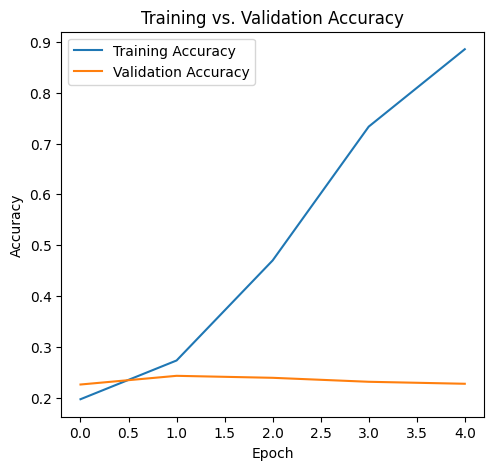

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')

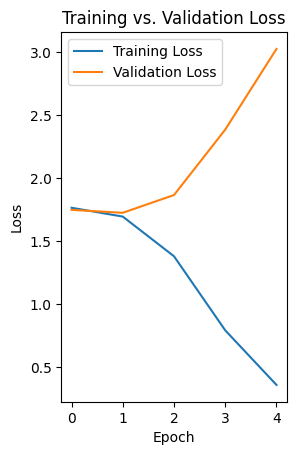

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')

plt.show()